In [1]:
import spacy
import pandas as pd
import os

In [2]:
basePath = os.path.abspath('') + "\\"
basePath

'D:\\projects\\'

Creating a stopwords list

In [3]:
stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
            "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
            "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
            "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
            "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
            "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
            "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
            "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
            "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
            "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [5]:
# Read the data
# file = basePath + "NLP\\sentiment_labelled_sentences\\full_set.txt"
# with open(file) as f:
#     content = f.readlines()
#
# content[0:10]

contents = ["I like this phone very much. It has a great balance between display and the battery life is excellent. Speakers sound good and the camera quality is excellent"]

In [8]:
nlp = spacy.load("en_core_web_sm");

def get_keywords(review_data):
    for x in review_data:
        doc = nlp(x)
        doc = [i.text for i in doc if
               i.text not in stop_words and
               i.pos_ == "NOUN"]
        doc = pd.Series(doc)
        return doc

In [9]:
print(get_keywords(contents))

0       phone
1     balance
2     display
3     battery
4        life
5    Speakers
6      camera
7     quality
dtype: object


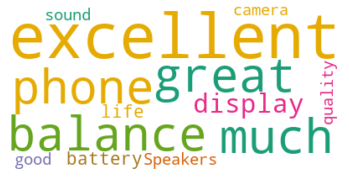

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white",
               colormap="Dark2",
               max_font_size=150,
               random_state=42)

wc.generate(" ".join(contents))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()